# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
n_records = data.shape[0] # Total number of records
n_greater_50k = (data['income'] == '>50K').sum() # Number of records where individual's income is more than $50,000
n_at_most_50k = (data['income'] == '<=50K').sum() # Number of records where individual's income is at most $50,000
greater_percent = (n_greater_50k * 100.0) / n_records # Percentage of individuals whose income is more than $50,000

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

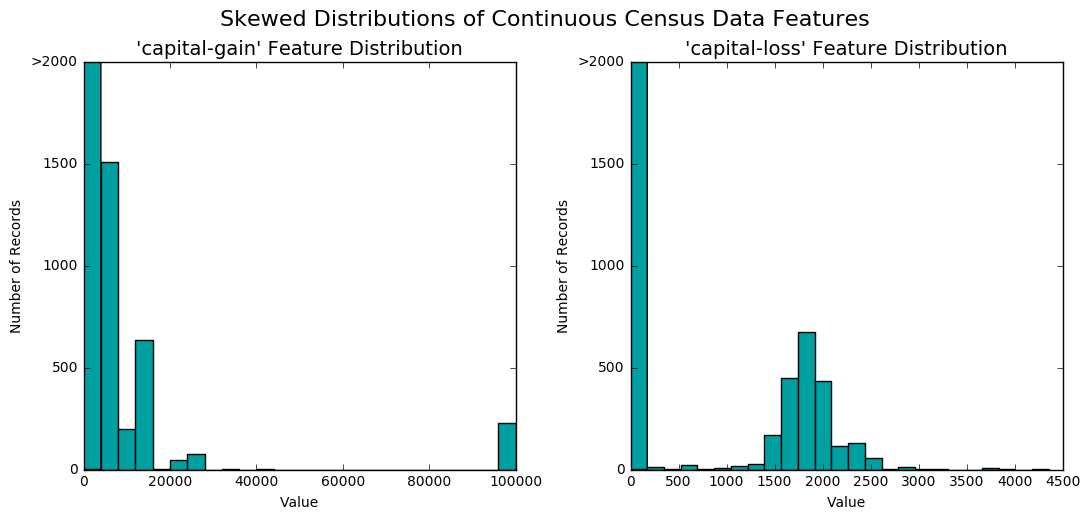

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis=1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

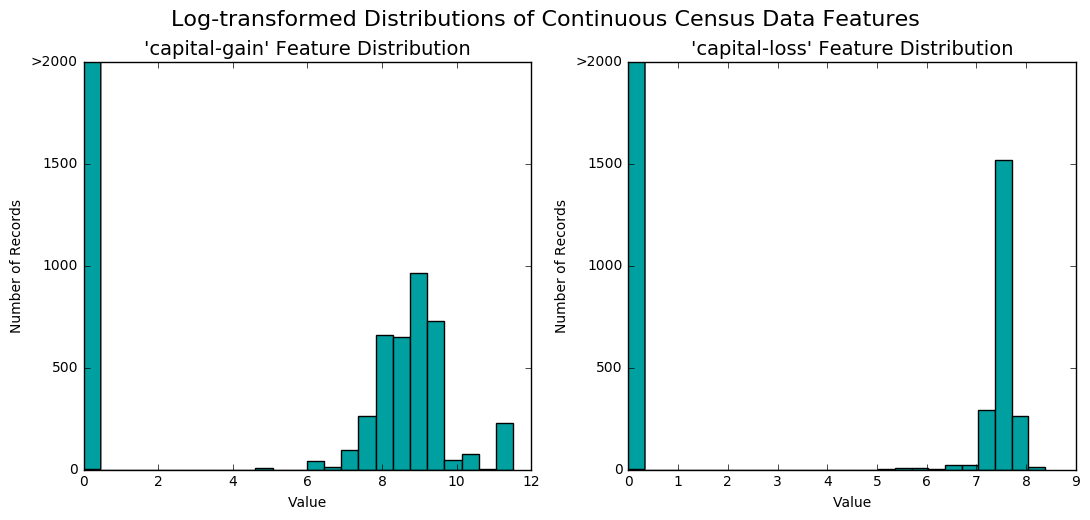

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed=True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica
7,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States
8,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.829751,0.0,0.500000,United-States
9,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.742849,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
features_final = pd.get_dummies(features_log_minmax_transform) # One-hot encode the 'features_log_minmax_transform'
income = income_raw.map({'<=50K': 0, '>50K': 1}) # Encode the 'income_raw' data to numerical values

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size=0.2, random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [8]:
TP = np.sum(income) # Counting the number of ones in `income`. This naive case predicts all ones.
FP = income.count() - TP # This will be the number of zeros in `income`, which equals number of false positives.

TN = 0 # No predicted negatives in this naive case.
FN = 0 # No predicted negatives in this naive case.

# Calculate accuracy, precision and recall
accuracy = (TP + TN)*(1.0) / (TP + FP + TN + FN)
recall = TP*(1.0) / (TP + FN)
precision = TP*(1.0) / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = ((1+beta**2)*precision*recall) / ((precision*beta**2) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: ** I am going to test the census data using **Support Vector Machines**, **K-Nearest Neighbors**, and **Gradient Boosting Classifier**.
#### Support Vector Machines (SVM)
- SVM algorithms are used for cancer prediction and prognosis [1, 2, 3, 4]. Specifically, research teams from biomedical and bioinformatics fields use SVMs (among other machine learning models) to make predictions about cancer susceptibility, survivability, and recurrence. To exemplify the efficacy of SVMs in cancer research, consider the following quote from [1] regarding the use of single nucleotide polymorphisms (SNPs) in a cancer susceptibility study, "The SVM and naive Bayes classifiers attained the highest accuracy using only a set of 3 SNPs and the decision tree classifier attained the highest accuracy using a set of 2 SNPs. The SVM classifier performed the best with an accuracy of 69%, while the naive Bayes and decision tree classifiers achieved accuracies of 67% and 68%, respectively. These results are approximately 23–25% better than chance."
- SVMs have several notable strengths. For example, they work well in high dimensional spaces, even when the number of dimensions exceeds the number of samples by a moderate amount. SVMs are memory efficient and are highly adaptable to data distributions through the specification of a kernel function. Several kernel functions are built-in but may also be defined by the user. Also, SVMs can handle both dense and sparse input data vectors. SVMs work especially well when input data is linearly separable. If this is the case then the `'linear'` kernel may be used which scales almost linearly to millions of samples and features. SVMs work well when data has been scaled to one of the intervals: `[0, 1]` or `[-1, 1]`. Parts of this answer are taken from [5].
- SVMs also have some notable disadvantages. They do not work well when the number of features is much greater than the number of samples; in this situation, overfitting can be challenging to avoid. Also, probability estimates are not directly provided with SVMs; they must be computed with an expensive cross-validation computation. SVMs do not scale well when the data is not linearly separable. In these sitations, SVMs can be computationally expensive. If we let $m$ represent the number of features and $n$ the number of samples, then the quadratic programming solver used by kernels that are not `'linear'` scales between $\mathcal{O}(mn^2)$ and $\mathcal{O}(mn^3)$. SVMs work poorly with highly skewed numerical data; scaling is a must in these sitations. SVMs cannot be used with categorical data directly; this data must be converted to numerical values. Also, the SVM implementations in Python cannot handle missing values in input vectors. These data points must be removed or the values imputed. Parts of this answer are taken from [5] and [7].
- We have preprocessed this data set to make it suitable to SVMs. Numerical data that was highly skewed was transformed using a `log()` transform. All numerical data was then scaled to the interval `[0, 1]`. Categorical data was converted to the binary set `{0, 1}` using the `get_dummies()` function. As such, the processed data is appropriately scaled and not skewed badly. Due to the number of categories, the data now has 103 features and is sparse, but SVMs work well with sparse data. Also, the number of features is far less than the number of samples, and we don't have any missing entries in the data. Due to these reasons, I believe using SVM is a good choice.

#### K-Nearest Neighbors (KNN)
- KNN algorithms are used in recommendation systems [8, 9, 10]. Recommendation systems are primarily used by websites and embedded software to make suggestions to users regarding things like media (e.g., movies, songs, e-books, etc.) and/or products that the user may want to consider purchasing or viewing. These recommendation systems might use a KNN endowed with a similarity metric to make suggestions that are similar to items or websites previously viewed by a user. Consider the following excerpt from Chapter 10 of White and Conway [9]. "It’s arguably the most intuitive of all the machine learning algorithms that we present in this book. Indeed, the simplest form of $k$-nearest neighbors is the sort of algorithm most people would spontaneously invent if asked to make recommendations using similarity data: they’d recommend the song that’s closest to the songs a user already likes, but not yet in that list."
- KNN has some very attractive advantages [11]. They are analytically tractable and simple to implement. This is because KNNs belong to a class of learners known as *lazy learners*. They don't spend any time training a model; all of the complexity is pushed to the prediction step. This also means that KNNs are non-parametric, so there are no model parameters that must be learned. KNNs only use local information, so they are highly adaptable. The computation for a query lends itself very well to parallel implementations. KNNs work very well in classification (or regression) problems where the number of data points or number of features is not extremely large, and the problem has an intuitive distance metric that correlates well to the labels.
- KNN also has some very challenging weaknesses to deal with [11]. In an *eager learning* algorithm, computational complexity occurs during training. Once that is completed, the training data may be discarded. But, KNN pushes all of the complexity to the prediction step when a query is made. This means that all of the training data must be saved and accessed at the moment of a query. This means that KNN has a very large storage requirement and a computationally expensive recall. KNN is highly susceptible to the curse of dimensionality. Also, if the most important features (for classification purposes) is categorical, there may not be a good distance metric or it could be difficult to determine. It is exactly such a situation (non-intuitive distance metric) where KNNs might perform poorly. Also, KNNs are not good if there are hundreds of thousands of data points or features (e.g., as there might be in text classification) due to the computationally expensive process of computing a distance from the query point to all of the other data points.
- I think this data set is suitable to the KNN algorithm because it is not extrememly large; there are ~36,000 data points in the training set and only 103 features after the previously mentioned one-hot encoding. Also, this classification problem has five continuous numerical features that I believe will correlate well with the labels in this classification problem. In other words, two points separated by a relatively large Euclidean distance in these features are likely to correspond to different classifications. *Note*: I plan to use the default (Euclidean) distance metric when I test this model. Hence, I believe KNN is a good choice for classification.

#### Gradient Boosting Classifier (GBC)
- GBC algorithms are used extensively for web-search ranking in internet search engines [12, 13, 14, 15]. One way in which machine learning is utilized for web searches is that a query-document pair is represented by a high-dimensional feature vector, and its label indicates the document's degree of relevance to the query [13]. Yahoo! has even hosted a competition challenging international teams of scientists to design top web-search algorithms [12, 15]. It turns out that GBC was very well represented in this competition; all winners used decision trees and ensemble methods [15].
- GBC algorithms are known to possess several highly desirable attributes [16]. They naturally handle heterogenous features and have high predictive power. They are not significantly affected by outliers due to the use of robust loss functions during training. GBCs also are very capable of learning non-linear relationships. GBCs are extraordinarily versatile (*hint: this will also be a weakness*), having a variety of hyperparameters that have the ability to optimize the model to learn extremely complicated relationships among many heterogeneous features. This tuning also makes GBCs fairly robust against overfitting. GBC algorithms (ensemble methods in general) are almost always a great choice as long as training time is not an issue. These methods are known to do very well in supervised learning competitions [15].
- GBC algorithms have a couple of undesireable attributes [16]. Scalability is a big issue. GBC models are built using all training data to sequentially improve upon a previous model using a collection of weak learners. This process does not lend itself to parallelization. Another weakness is that GBCs almost certainly require quite a bit of tuning of at least three hyperparameters. Without any tuning, GBCs are prone to overfitting with deep decision trees. When combined with the curse of dimensionality, constructing an optimal GBC model can take a lot of time. Even in relatively small dimensional spaces (like the one we are working with), tuning the optimal training might take up to an hour or more on a personal computer. Hence, although GBCs are very powerful, they are not a good choice in situations where your data lies in a very high dimensional space and time is a big factor, unless you have a powerful computer.
- As mentioned above, our data set is not extraordinarily large. I would expect some overfitting might come into play using the default values of the GBC learner, but optimizing the parameters of this method will not be a big issue. It might take 30 minutes or even an hour to tune the most important three hyperparameters, but that is fine. Hence, I believe GBC to be a very good candidate for our data set.

**Note**: I would also like to mention that I made use of scikit-learn's own documentation to decide which learning models I would use. If one follows scikit-learn's flow chart (a.k.a., their algorithm cheat-sheet) on their *Machine Learning Map* webpage [6], we see that the above three models are all recommended for the type of classification problem in this project.

#### References
1. J. Cruz, D. Wishart. Applications of machine learning in cancer prediction and prognosis. *Cancer Informatics*, 2006, 2: 59-77. [[PubMed Article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2675494/)]
2. G. Wang, K. Lam, Z. Deng, K. Choi. Prediction of mortality after radical cystectomy for bladder cancer by machine learning techniques. *Computers in Biology and Medicine*, 2015, 63: 124-132. [[PubMed Abstract](https://www.ncbi.nlm.nih.gov/pubmed/26073099)]
3. P. Liyan, L. Guangjian, L. Fangqin, Z. Shuling, X. Huimin, S. Xin, L. Huiying. Machine learning applications for prediction of relapse in childhood acute lymphoblastic leukemia. *Scientific Reports*, 2017, 7: 7402. [[PubMed Article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5547099/)]
4. M. Akay. Support vector machines combined with feature selection for breast cancer diagnosis. *Expert Systems with Applications*, 2009, 36: 3240-3247. [[Semantic Scholar Article](https://pdfs.semanticscholar.org/fe83/150bc326fd62d352cb2993ac91344f195e10.pdf)]
5. scikit-learn documentation. *Support Vector Machines*. Retrieved November 13, 2017 from [http://scikit-learn.org/stable/modules/svm.html](http://scikit-learn.org/stable/modules/svm.html).
6. scikit-learn documentation. *Machine Learning Map*. Retrieved November 13, 2017 from [http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).
7. S. Singh. *Understanding Support Vector Machine via Examples*. Retrieved November 14, 2017 from [https://sadanand-singh.github.io/posts/svmpython/](https://sadanand-singh.github.io/posts/svmpython/).
8. R. Nowling. *Recommendation System Using K-Nearest Neighbors*. Retrieved November 14, 2017 from [http://rnowling.github.io/data/science/2016/10/29/knn-recsys.html](http://rnowling.github.io/data/science/2016/10/29/knn-recsys.html).
9. J. White, D. Conway. *Machine Learning for Hackers*. O'Reilly Media, Inc., February 2012. [[Safari Books Online Text](https://www.safaribooksonline.com/library/view/machine-learning-for/9781449330514/)]
10. B. Frederickson. *Approximate Nearest Neighbours for Recommender Systems*. Retrieved November 14, 2017 from [https://github.com/benfred/bens-blog-code/tree/master/approximate_als](https://github.com/benfred/bens-blog-code/tree/master/approximate_als).
11. R. Gutierrez-Osuna. *Nearest Neighbors (Texas A&M Lecture Notes for CSCE 666)*. Retrieved November 17, 2017 from [http://research.cs.tamu.edu/prism/lectures/pr/pr_l8.pdf](http://research.cs.tamu.edu/prism/lectures/pr/pr_l8.pdf).
12. A. Mohan, Z. Chen, K. Weinberger. Web-Search Ranking with Initialized Gradient Boosted Regression Trees. *Journal of Machine Learning Research: Proceedings of the Learning to Rank Challenge*, 2010, 14: 77-89. [[JMLR Article](http://proceedings.mlr.press/v14/mohan11a/mohan11a.pdf)]
13. S. Tyree, K. Weinberger, K. Agrawal. Parallel Boosted Regression Trees for Web Search Ranking. *Proceedings of the International World Wide Web Conference*, 28 March - 1 April 2011, pages 387-396. [[WWW Conference Article](http://wwwconference.org/proceedings/www2011/proceedings/p387.pdf)]
14. P. Li, C. Burges, Q. Wu. McRank: Learning to Rank Using Multiple Classification and Gradient Boosting. *Advances in Neural Information Processing Systems*, 2007, 20: 3270. [[NIPS Article](https://papers.nips.cc/paper/3270-mcrank-learning-to-rank-using-multiple-classification-and-gradient-boosting.pdf)]
15. O. Chapelle, Y. Chang. Yahoo! Learning to Rank Challenge Overview. *Journal of Machine Learning Research: Proceedings of the Learning to Rank Challenge*, 2010, 14: 1-24. [[JMLR Article](http://proceedings.mlr.press/v14/chapelle11a/chapelle11a.pdf)]
16. scikit-learn documentation. *Gradient Boosting*. Retrieved November 17, 2017 from [http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting](http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [9]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    results['train_time'] = end - start # Calculate the training time
        
    # Get the predictions on the test set(X_test) and on the first 300 training samples(X_train)
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    results['pred_time'] = end - start # Calculate the total prediction time
    
    # Calculate accuracy and F-scores
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train) # Compute accuracy on training samples
    results['acc_test'] = accuracy_score(y_test, predictions_test) # Compute accuracy on test set    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5) # Compute F-score on training samples
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5) # Compute F-score on test set
       
    # Print a success statement
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


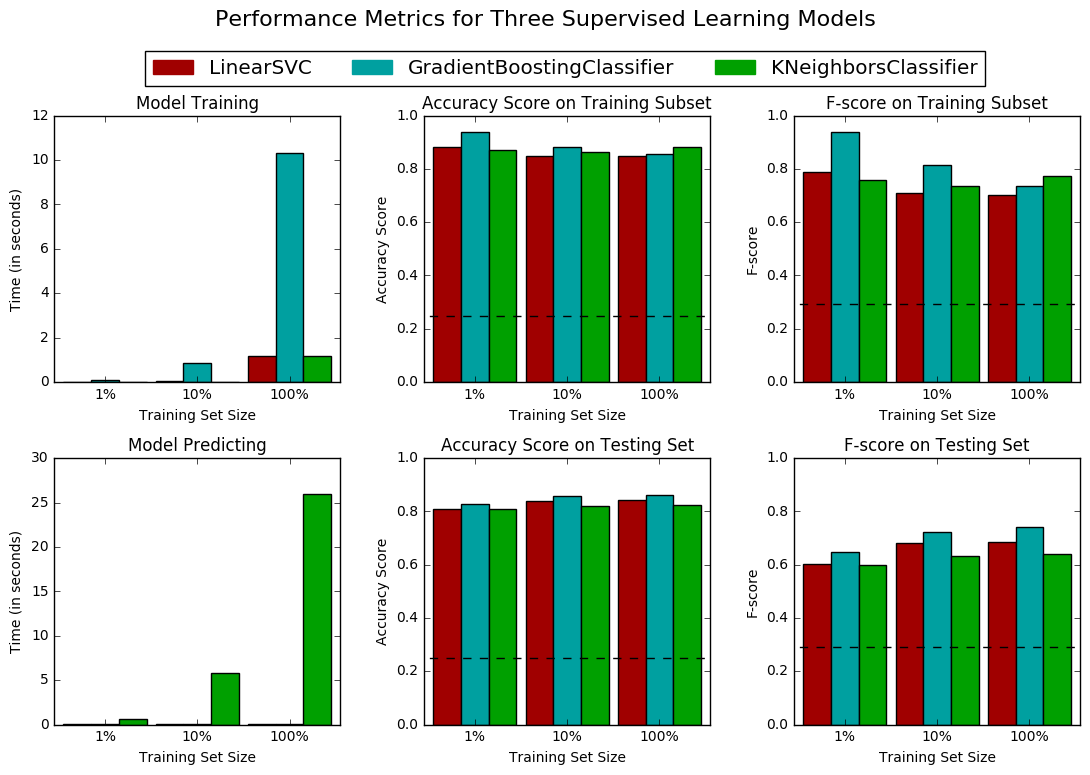

In [10]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the three models
clf_A = LinearSVC(random_state=1984)
clf_B = KNeighborsClassifier()
clf_C = GradientBoostingClassifier(random_state=1984)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = samples_100 / 10
samples_1 = samples_10 / 10

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: ** I believe the best model for your data is the Gradient Boosting Classifier (GBC). In addition to GBC I looked at two other models, a Linear Support Vector Classifier and a K-Nearest Neighbor Classifier. I used two metrics for evaluation: *accuracy* and *F-score*. Let me briefly explain those. Accuracy is simply the proportion of correct classifications on the testing subset of the data. In other words it is the sum of *True Positives* and *True Negatives* divided by the total number of data entries in the testing set. This metric is important, but in your specific case I believe the F-score metric is a little bit more useful. F-score is actually a weighted harmonic mean of *precision* and *recall*. Precision is the proportion of individuals the model classified as earning at least \$50,000 per year who actually did earn that much, i.e., the number of *True Positives* divided by the sum of *True Positives* and *False Positives*. Recall is the proportion of individuals who actually earned at least \$50,000 per year identified by the model, i.e., the number of *True Positives* divided by the sum of *True Positives* and *False Negatives*. F-score allows me to weight the score more toward precision, which I believe is more important for your specific needs. As you can see in the attached image, when I used 100% of the training data available to train the model, GBC had the top F-Score.

In addition to F-score, there are two other considerations: training/prediction time and algorithm suitability. As you can see from the image, GBC is the slowest model to train but makes predictions essentially instantaneously. Given the size of your data set, the training time (albeit the slowest among the three) is not a concern. Hence, I do not allow this slow training time to disqualify GBC from selection. GBC has several advantages that make it suitable for your data. It naturally handles heterogenous features, numerical and categorical. GBC is known to be fairly robust to overfitting, which instills the classifier with high predictive power despite outliers in the data. I suspect that your data set may have several outliers. For all of these reasons, I am choosing the GBC algorithm to predict whether or not an individual makes at least \$50,000 per year.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** Gradient Boosting Classification (GBC) is considered an ensemble method. Ensemble methods combine predictions from a collection of base estimators to improve generalizability and robustness over a single estimator [1]. We refer to these base estimators as *weak learners*. Basically, a weak learner is a learning model that is guaranteed to always do better than chance regardless of how the training data is distributed [2].  The important thing is that GBC uses *decision trees* for its weak learners. A decision tree is a simple construct. A feature and decision threshold is selected which splits the data into two groups (nodes). I will mention below how GBC determines this split, but for now consider this example. It could be that the algorithm chooses the feature `capital-gain` and splits the data as follows: if `captial-gain > 0`, assign a label of `1` (individual makes at least \$50,000), and otherwise assign a label of `0`. This example is a decision tree with depth one; however, instead of labeling after one decision, we could further split the data using other features and a deeper decision tree. GBC is quite versatile and allows us to tune quite a few parameters that control how we build our decison trees, e.g., maximum tree depth, minimum samples needed for a split, minimum samples allowed in a leaf (label node), maximum number of leaf nodes, etc. Now that we have this foundational description of GBC's base estimators, let's consider how the algotithm actually works.

The training process begins with some initial decision tree model and continues to modify the current model additively until the algorithm reaches a pre-determined number of estimators, which may also be tuned to optimize the model. Essentially, at each stage of this additive process there are two things that must be determined: a new decision tree and a weight that will multiply the new decision tree before it is added to the previous (current) model. The predictive power of GBC lies in how these two things are computed. At each stage, the new decision tree (and hence all of its splits based upon the tree parameters) and weight are chosen to minimize some *loss function* [3]. The details of the loss function used to build your data's classifier is not important, but it's called *binomial deviance*. The way we solve this optimization problem is mathematically complicated, but it uses a method called *steepest descent*. To understand how steepest descent works consider the following analogy. Imagine you are hiking down a mountain and want to determine the fastest route to the bottom. Each time you take a step, you must determine two things: what direction do I step and how far do I step? Your "data" is your visual representation of the mountain in your vicinity. Your objective funtion (i.e., your loss function) is your current altitude on the mountain. You look all around you (i.e., consider all the data) and find the direction that "goes down the most". Now you step in that direction as far as possible, i.e., the distance along that direction that minimizes the loss function the most under reasonable constraints. In this analogy, obviously you would be constrained by how far you can step. But in the real problem, you step in the direction of steepest descent as "far" as you can to minimize your loss function as much as possible in that step. Effectively, at each stage of the process more emphasis will be given to correctly classifying points that were mis-classified in the previous step, and less emphasis will be given to points previously classified correctly. This process is repeated until the training process concludes when the maximum number of estimators is reached. Each individual estimator may only be trivially better than chance alone, but this weighted sum of estimators is much better than chance and robust against overfitting. Once the training is done, GBC has a very simple and fast prediction process. The parameters of a test data point are passed to the function that was built, and a classification label is determined nearly instantaneously.

**References**
1. scikit-learn documentation. *Ensemble Methods*. Retrieved November 17, 2017 from [http://scikit-learn.org/stable/modules/ensemble.html](http://scikit-learn.org/stable/modules/ensemble.html)
2. Stack Exchange. *Cross Validated - What is meant by 'weak learner'?*. Retrieved November 17, 2017 from [https://stats.stackexchange.com/questions/82049/what-is-meant-by-weak-learner](https://stats.stackexchange.com/questions/82049/what-is-meant-by-weak-learner)
3. scikit-learn documentation. *Gradient Boosting*. Retrieved November 17, 2017 from [http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting](http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [11]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# Parameter dictionary to be tuned
parameters = {'min_samples_split': [1000, 1200], 'max_depth': [8, 10, 12], 'min_samples_leaf': [80, 100]}
### Thanks to the following reference for ideas on the best parameters to tune with Gradient Boosting Classifier:
### Aarshay Jain, Analytics Vidhya. "Complete Guide to Parameter Tuning in Gradient Boosting (GBM) in Python" 
### https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

# Initial set-up chores
clf = GradientBoostingClassifier(random_state=1984) # initialize the classifier
scorer = make_scorer(fbeta_score, beta=0.5) # fbeta_score scoring object using make_scorer()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer) # grid search on the classifier using 'scorer' for scoring

# Fitting
grid_fit = grid_obj.fit(X_train, y_train) # fit the grid search object to the training data
best_clf = grid_fit.best_estimator_ # get the estimator

# Predicting
predictions = (clf.fit(X_train, y_train)).predict(X_test) # make predictions using the unoptimized model
best_predictions = best_clf.predict(X_test) # make predictions using the optimized model

# Report the before-and-after scores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8708
Final F-score on the testing data: 0.7513


In [12]:
best_clf.get_params()

{'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 80,
 'min_samples_split': 1000,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 1984,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8630       |     0.8708      |
| F-score        |      0.7395       |     0.7513      |


**Answer: ** The accuracy score and F-score that I obtained after optimizing my model are better than the unoptimized model. The accuracy score increased from 0.8630 to 0.8708 and the F-score increased from 0.7395 to 0.7513. My optimized model is far better than the naive predictor benchmarks from **Question 1**. The naive predictor had an accuracy score of 0.2478 and an F-score of 0.2917. The accuracy score is more than three times higher than the benchmark, and the F-score is more almost 2.5 times higher than the benchmark. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:** I would rank the five most important features as follows:
1. **occupation** - It seems to me that this feature would be the best predictor of whether or not an individual earned at least \$50,000 per year or not. For example, it would seem that individuals labeled as `Exec-managerial` or `Prof-specialty` would be very likely to earn over \$50,000 per year, whereas individuals labeled as `Adm-clerical` or `Handlers-cleaners` would be very unlikely to earn over \$50,000 per year.
2. **education_level** - I believe this feature is the second most important for predicting whether or not an individual earns at least \$50,000 per year. I do not believe this feature is independent of the first one. I think that individuals with a higher education level are more likely to have one of the occupations that yield higher salaries. There may be plenty of exceptions; some people labeled as `Sales` or `Farming-fishing` may very well have a low `education_level`, but might earn very large salaries. However, I think over the entire data set, these instances will be few. 
3. **education-num** - I believe this feature is almost (but not entirely) identical to the previous one. The primary difference is that this one is already numerical, whereas the previous one was categorical and was subject to one-hot encoding. I do not think that there will be a large (or perhaps even noticeable) difference between the predictive power of this feature compared to the previous one. Nevertheless, I am placing this one as the third most important.
4. **workclass** - I do not think it will be nearly as significant as the previous three, but I expect `workclass` to be fourth most important. My reasoning is from inspecting the labels. I know that, in general, both federal and state government employees make very good salaries and have great benefits. And certainly those labeled as `Without-pay` or `Never-worked` should almost certainly make less than \$50,000 per year. The other labels for this category would have less prediction power in my opinion, although I would suspect a fairly large percentage of individuals who are self-employed should make more than \$50,000 per year.
5. **hours-per-week** - Although I suspect it will not have truly impactful predictive power, I am placing `hours-per-week` as my guess for fifth most important. I realize that plenty of people who work long hours will earn less than \$50,000 per year and some who work only part-time will earn much more than \$50,000 per year. However, I believe that this feature will be better than flipping a coin as a predictor of whether or not a person earns at least \$50,000 per year. The primary reason that I am choosing this feature fifth is that I think all of the remaining features (`age`, `marital-status`, `relationship`, `race`, `sex`, `capital-gain`, `capital-loss`, and `native-country`) will have nearly trivial predictive power.

*Note*: I do think people who have non-zero capital gains and/or losses might be a good predictor of people making more than \$50,000. However, I think the data set will be sparse in non-zero values for these two features. The problem with that is that I suspect this predictive power to be one-sided. In other words, I do not think that having a zero value in both `capital-gain` and `capital-loss` (most of the data entries) will be a good predictor of someone who makes less than \$50,000 per year. Hence, I have chosen to consider these two features unimportant and have selected `workclass` and `hours-per-week`, instead.


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

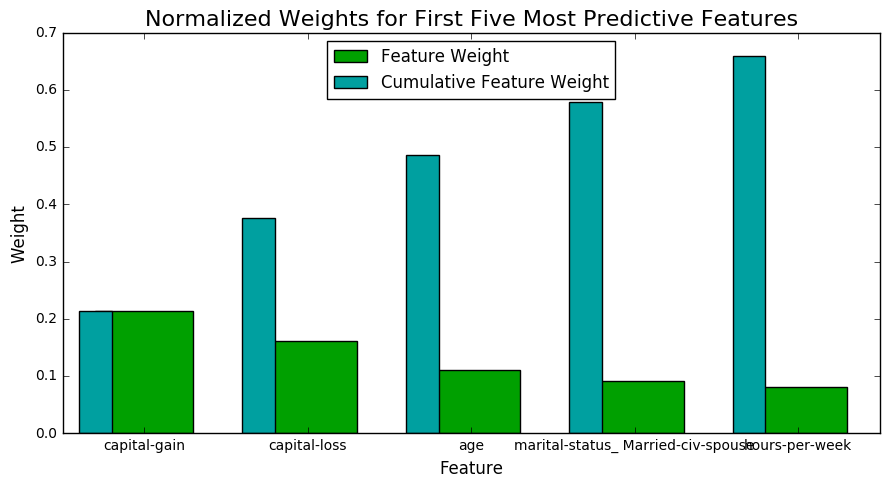

In [13]:
# Import a supervised learning model that has 'feature_importances_'
#### I have already used a supervised learning model that has the `feature_importances_` attribute.

# Train the supervised model on the training set using .fit(X_train, y_train)
#### This was completed above with the model I selected.

importances = best_clf.feature_importances_ # Extract the feature importances using .feature_importances_ 

# Plot the top five most important features
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:** These five features surprised me when I first saw them; they do not match my guesses well at all. The lone intersection is `hours-per-week` which I had as my number five most important feature, and it turned out to be the actual number five most important feature. My remaining four important features are not represented among the actual top five important features. Nevertheless, I can reason why these features are likely more relevant. Features `capital-gain` and `capital-loss` make the most sense in hindsight. Individuals who have non-zero capital gains and/or losses are more likely to be individuals who have businesses, are wealthy, or perhaps dabble in real estate ventures. It would make sense that this would be a decent indicator of an individual who makes at least \$50,000 per year. I can also understand why the feature `age` would be among the most important features. When I was making my list, I was considering placing this feature third. My thinking was that a person's age would be a good indicator of whether or not that person made more than \$50,000 per year. However, after looking at the first 50 data entries in the data set that assumption seemed less likely. I should have gone with that original intuition. It does seem logical to presume that, in general, older individuals are more likely to make at least \$50,000 per year. The last remaining feature among the actual top five is `marital-status_ Married-civ-spouse`. I suppose marital status is not entirely independent of age. Also, it could be argued that married individuals are more likely to be post-college, and hence married people are more likely to have a professional job that pays over \$50,000 per year.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [14]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8708
F-score on testing data: 0.7513

Final Model trained on reduced data
------
Accuracy on testing data: 0.8383
F-score on testing data: 0.6898


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:** The final model's accuracy was 87.08% when the data was trained on the full data, but was reduced to 83.83% when it was trained on the reduced data. The F-score was also decreased when going from the full data to the reduced data, from 75.13% to 68.98%. Whether or not I would consider using this reduced data set depends on a couple of things. First and foremost, I would ask the customer, *CharityML*, if they had any accuracy thresholds that were important to them. I would also ask them if they intended to use the model outside of the geographical region where the training data was collected. If so, they may want to train a new data set using this same model with many more data points, e.g., one or two orders of magnitude. So the short answer is yes, I would definitely consider using the reduced data if training time was a consideration, but the decision to do so is not trivial. The F-score did not decrease by a trivial amount, but it may still exceed the customer's expectations. If they intended on retraining a new data set with this exact model on a collection of 4,000,000 data points, then the time required to train on the full data may be prohibitive. If this is a one-time model construction project for *CharityML*, then I suspect they would appreciate the increased F-score and sacrifice a one-hour parameter tuning process.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.